### Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Naive Bayes'

In [3]:
#Importing a dataset and making a copy
Data = pd.read_csv('C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Logistic Regression\\Churn_Modelling.csv')
df = Data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(df.columns[0:3],axis = 1,inplace = True)

In [5]:
df = pd.get_dummies(df,columns = df.columns[df.dtypes == 'object'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [6]:
df.shape

(10000, 12)

In [7]:
features = df.columns[df.columns != 'Exited']
X = df[features]
y = df['Exited'].copy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

### Fitting Naive Bayes to training set

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
classifier.predict_proba(X_test)

array([[0.7789533 , 0.2210467 ],
       [0.94312425, 0.05687575],
       [0.71653983, 0.28346017],
       ...,
       [0.85340176, 0.14659824],
       [0.89702887, 0.10297113],
       [0.60022492, 0.39977508]])

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

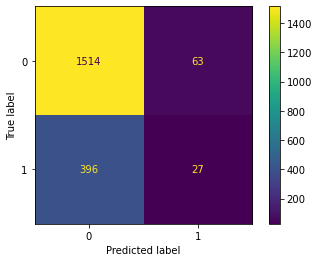

In [15]:
disp = ConfusionMatrixDisplay((confusion_matrix(y_test,y_pred)))
disp.plot()
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1577
           1       0.30      0.06      0.11       423

    accuracy                           0.77      2000
   macro avg       0.55      0.51      0.49      2000
weighted avg       0.69      0.77      0.71      2000



Model is biased towards 0 .

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score

In [18]:
classifier.classes_[1]

1

In [19]:
roc_auc_score(y_test,classifier.predict(X_test))

0.5119402582333815

### Check if there is any chance to improve our model 

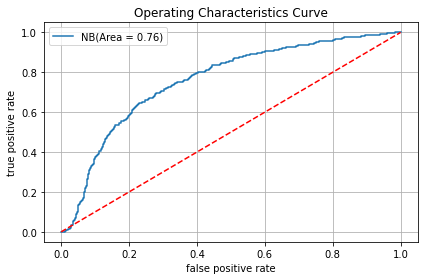

In [20]:
fpr,tpr,threshold = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label ='NB(Area = %0.2f)' %  roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]) )
plt.plot([0,1],[0,1],'r--')
plt.grid()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Operating Characteristics Curve')
plt.legend(loc=0)
plt.tight_layout()

In [21]:
prob = pd.DataFrame(classifier.predict_proba(X_test))#,columns=['Z','O'])
prob.head()

,0,1
0,0.778953,0.221047
1,0.943124,0.056876
2,0.716540,0.283460
3,0.885161,0.114839
4,0.679228,0.320772


In [22]:
X_test.shape

(2000, 11)

In [23]:
prob.index[prob[1]>0.5]

Int64Index([  65,   91,  111,  173,  181,  191,  219,  239,  243,  265,  314,
             372,  397,  408,  427,  428,  448,  457,  464,  481,  484,  540,
             549,  562,  619,  632,  646,  696,  754,  787,  802,  809,  842,
             863,  897,  902,  919,  927,  933,  994,  997, 1048, 1069, 1084,
            1127, 1138, 1164, 1182, 1218, 1246, 1247, 1259, 1268, 1273, 1307,
            1308, 1316, 1327, 1344, 1351, 1379, 1404, 1409, 1417, 1440, 1493,
            1519, 1531, 1558, 1570, 1593, 1621, 1625, 1630, 1675, 1733, 1765,
            1790, 1796, 1808, 1835, 1839, 1841, 1872, 1925, 1958, 1960, 1966,
            1972, 1982],
           dtype='int64')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1577
           1       0.43      0.64      0.51       423

    accuracy                           0.74      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.79      0.74      0.76      2000

AUC :-  0.7053252202539161


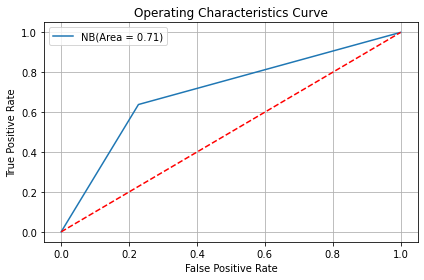

In [35]:
out = np.zeros(X_test.shape[0])
print(out[:10])
out[prob.index[prob[1]>0.22]] = 1
print(out[0:10])
print(classification_report(y_test,out))
print('AUC :- ',roc_auc_score(y_test,out))
fpr, tpr ,threshold = roc_curve(y_test,out)
plt.plot(fpr,tpr,label ='NB(Area = %0.2f)' %  roc_auc_score(y_test,out) )
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristics Curve')
plt.grid()
plt.legend(loc=0)
plt.tight_layout()